<a href="https://colab.research.google.com/github/diagnosischeck/Flask-Admin-Mongo-Example/blob/master/My_Hands_On_Practice_ANN_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fashion MNIST**

In this practical application notebook, we will work with fashion MNIST dataset to carry out a classification exercise using Artificial Neural Networks.
Dataset

The dataset, Fashion MNIST, is a collection of apparel images falling into several classes. Classes are numbered from 0 to 9 and have the following meanings with Tshirt/Top represented as 0 and an Ankle Boot as 9.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Objective**




In this exercise, we will create a simple ANN model to classify the images into some categories


**Toolkit**

We will use TensforFlow, tensorflow implementation of keras on google colab for this exercise.

**Loading the libraries**

In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tf.__version__

'2.9.2'

**Loading the Data**

Let's import the data from the tf.keras.datasets and prepare the train and the test set.

In [5]:
# Load the data
(X_train, trainY), (X_test,testY) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
X_train.shape[1] * X_train.shape[2]

784


*   This suggests that there are 60000 images of size 28*28 in the training  set and 10000 images of size 28*28 in the test set.

*  Note that we will need to flatten these images before fitting an ANN model. 
Let us now explore the classes present in the dataset.



In [8]:
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

This suggests that the train set has 10 classes where each class denotes one type of apparel.

**Encoding the target variable**

*   We need to one hot encode the target variable to be able to form the training target vector.
*   Hint: check tf.keras.utils.to_categorical() - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical



In [9]:
y_train = tf.keras.utils.to_categorical(trainY,num_classes=10)
y_test = tf.keras.utils.to_categorical(testY,num_classes=10)

# Let's have a look at the shapes of all the datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [10]:
## Let's normalize the dataset. Since there are pixel values ranging from 0-255, let us divide by 255 to get the new ranges from 0-1
X_train = X_train/255
X_test = X_test/255

**Visualization**

*   Now, let us visualize the data items.

*   We will visualize the first 24 images in the training dataset.


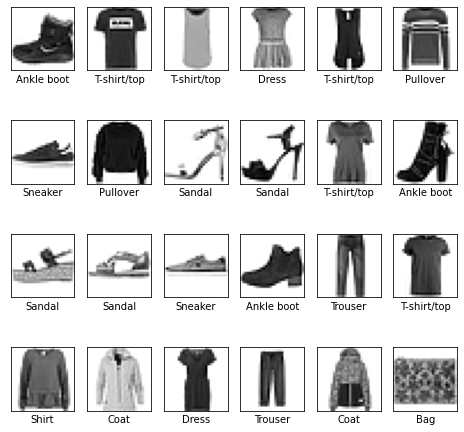

In [11]:
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(24):
    plt.subplot(4,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_list[trainY[i]])
plt.show()

**Model Building**


*  We will now start with the model building process.
*  We will create a model with

  *   A layer to flatten the input
  *   A hidden layer with 64 nodes (You can play around with this number) and 'relu' activation.
  *   Output layer




**Model-1**

**Question 1: Add the output layer with activation function and number of neurons required based on the problem statement.**

In [12]:
# Initialize sequential model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')   # Remove this and complete the code.
])